In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from datetime import datetime

In [85]:
# Load data into dataframe.
df = pd.read_csv(r'Data/us_retail_sales.csv')

# Viewing the dataframe.
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [86]:
# Converting all columns to float except 'YEAR' column.
df.loc[:, df.columns != 'YEAR'] = df.loc[:, df.columns != 'YEAR'].astype(float)
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925.0,147223.0,146805.0,148032.0,149010.0,149800.0,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555.0,156266.0,154752.0,158979.0,160605.0,160127.0,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518.0,169649.0,172766.0,173106.0,172329.0,174241.0,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413.0,179488.0,181013.0,181686.0,183536.0,186081.0,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135.0,192266.0,194029.0,194744.0,196205.0,196136.0,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


In [87]:
# Replacing 'NA' values with 0.
df = df.fillna(0)

In [88]:
# Creating new dataframe for plotting.
df2 = df.melt(id_vars=["YEAR"], 
        var_name="Month", 
        value_name="Sales")
df2['Date'] = pd.to_datetime(df2['YEAR'].astype(str) + df2['Month'], format='%Y%b')
df2.head()

,YEAR,Month,Sales,Date
0,1992,JAN,146925.0,1992-01-01
1,1993,JAN,157555.0,1993-01-01
2,1994,JAN,167518.0,1994-01-01
3,1995,JAN,182413.0,1995-01-01
4,1996,JAN,189135.0,1996-01-01


1. Plot the data with proper labeling and make some observations on the graph.

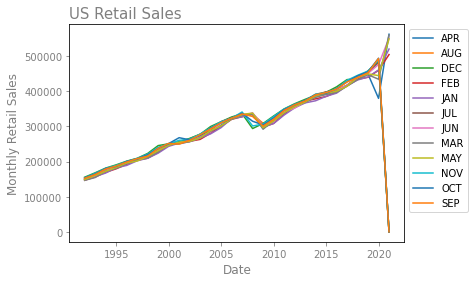

In [109]:
# Plotting line graph.
df2.groupby(['YEAR','Month'])['Sales'].sum().unstack().plot()
plt.title('US Retail Sales', loc='left', fontsize=15, color='grey')
plt.xlabel('Date', fontsize=12, color='grey')
plt.ylabel('Monthly Retail Sales', fontsize=12, color='grey')
plt.tick_params(axis='x', colors='grey')
plt.tick_params(axis='y', colors='grey')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

Overall, US Retail sales have been increasing. But there's minute drop in retail sales during the crisis(2008-2009) and also at the time of pandemic(2020).

2. Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [103]:
# Splitting out training data.
df2['MonthInNum'] = df2['Date'].dt.month
train_df = df2[df2['Date'] < '2020-07-01']
X_train = train_df[['YEAR','MonthInNum']]
Y_train = train_df['Sales']

# Splitting out test data.
test_df = df2[(df2['Date'] >= '2020-07-01') & (df2['Date'] < '2021-07-01')]
x_test = test_df[['YEAR','MonthInNum']]
y_test = test_df['Sales']

3. Use the training set to build a predictive model for the monthly retail sales.

In [106]:
# Creating linear model.
model = LinearRegression()

# Fitting the model to the training set.
model.fit(X_train, Y_train)

LinearRegression()

4. Use the model to predict the monthly retail sales on the last year of data.

In [107]:
# Predicting the last years retail sales.
test_predictions = model.predict(x_test)

5. Report the RMSE of the model predictions on the test set.

In [108]:
print('Test RMSE:', metrics.mean_squared_error(y_test, test_predictions, squared=False))

Test RMSE: 66511.08639264209
